In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})

In [2]:
-np.log10(df['p_value_permfit'])

NameError: name 'df' is not defined

In [33]:
brain_variables = ['25056-2.0', '25057-2.0', '25060-2.0', '25059-2.0', '25061-2.0', '25058-2.0', '25009-2.0', '25025-2.0',
                   '25898-2.0', '25901-2.0', '25904-2.0', '25907-2.0', '25910-2.0', '25913-2.0', '25916-2.0', '25919-2.0',
                   '25396-2.0', '25393-2.0', '25392-2.0', '25394-2.0', '25397-2.0', '25395-2.0', '25156-2.0', '25153-2.0',
                   '25152-2.0', '25154-2.0', '25157-2.0', '25108-2.0', '25105-2.0', '25104-2.0', '25106-2.0', '25109-2.0',
                   '25107-2.0', '25300-2.0', '25297-2.0', '25296-2.0', '25298-2.0', '25301-2.0', '25299-2.0', '25252-2.0',
                   '25251-2.0', '25253-2.0', '25250-2.0', '25248-2.0', '25249-2.0', '25203-2.0', '25205-2.0', '25202-2.0',
                   '25200-2.0', '25201-2.0', '25204-2.0', '25443-2.0', '25445-2.0', '25442-2.0', '25440-2.0', '25441-2.0',
                   '25444-2.0', '25347-2.0', '25349-2.0', '25346-2.0', '25344-2.0', '25345-2.0', '25348-2.0', '25892-2.0',
                   '25001-2.0', '25005-2.0']

df[df['variable'].isin(brain_variables)]['p_value']

KeyError: 'p_value'

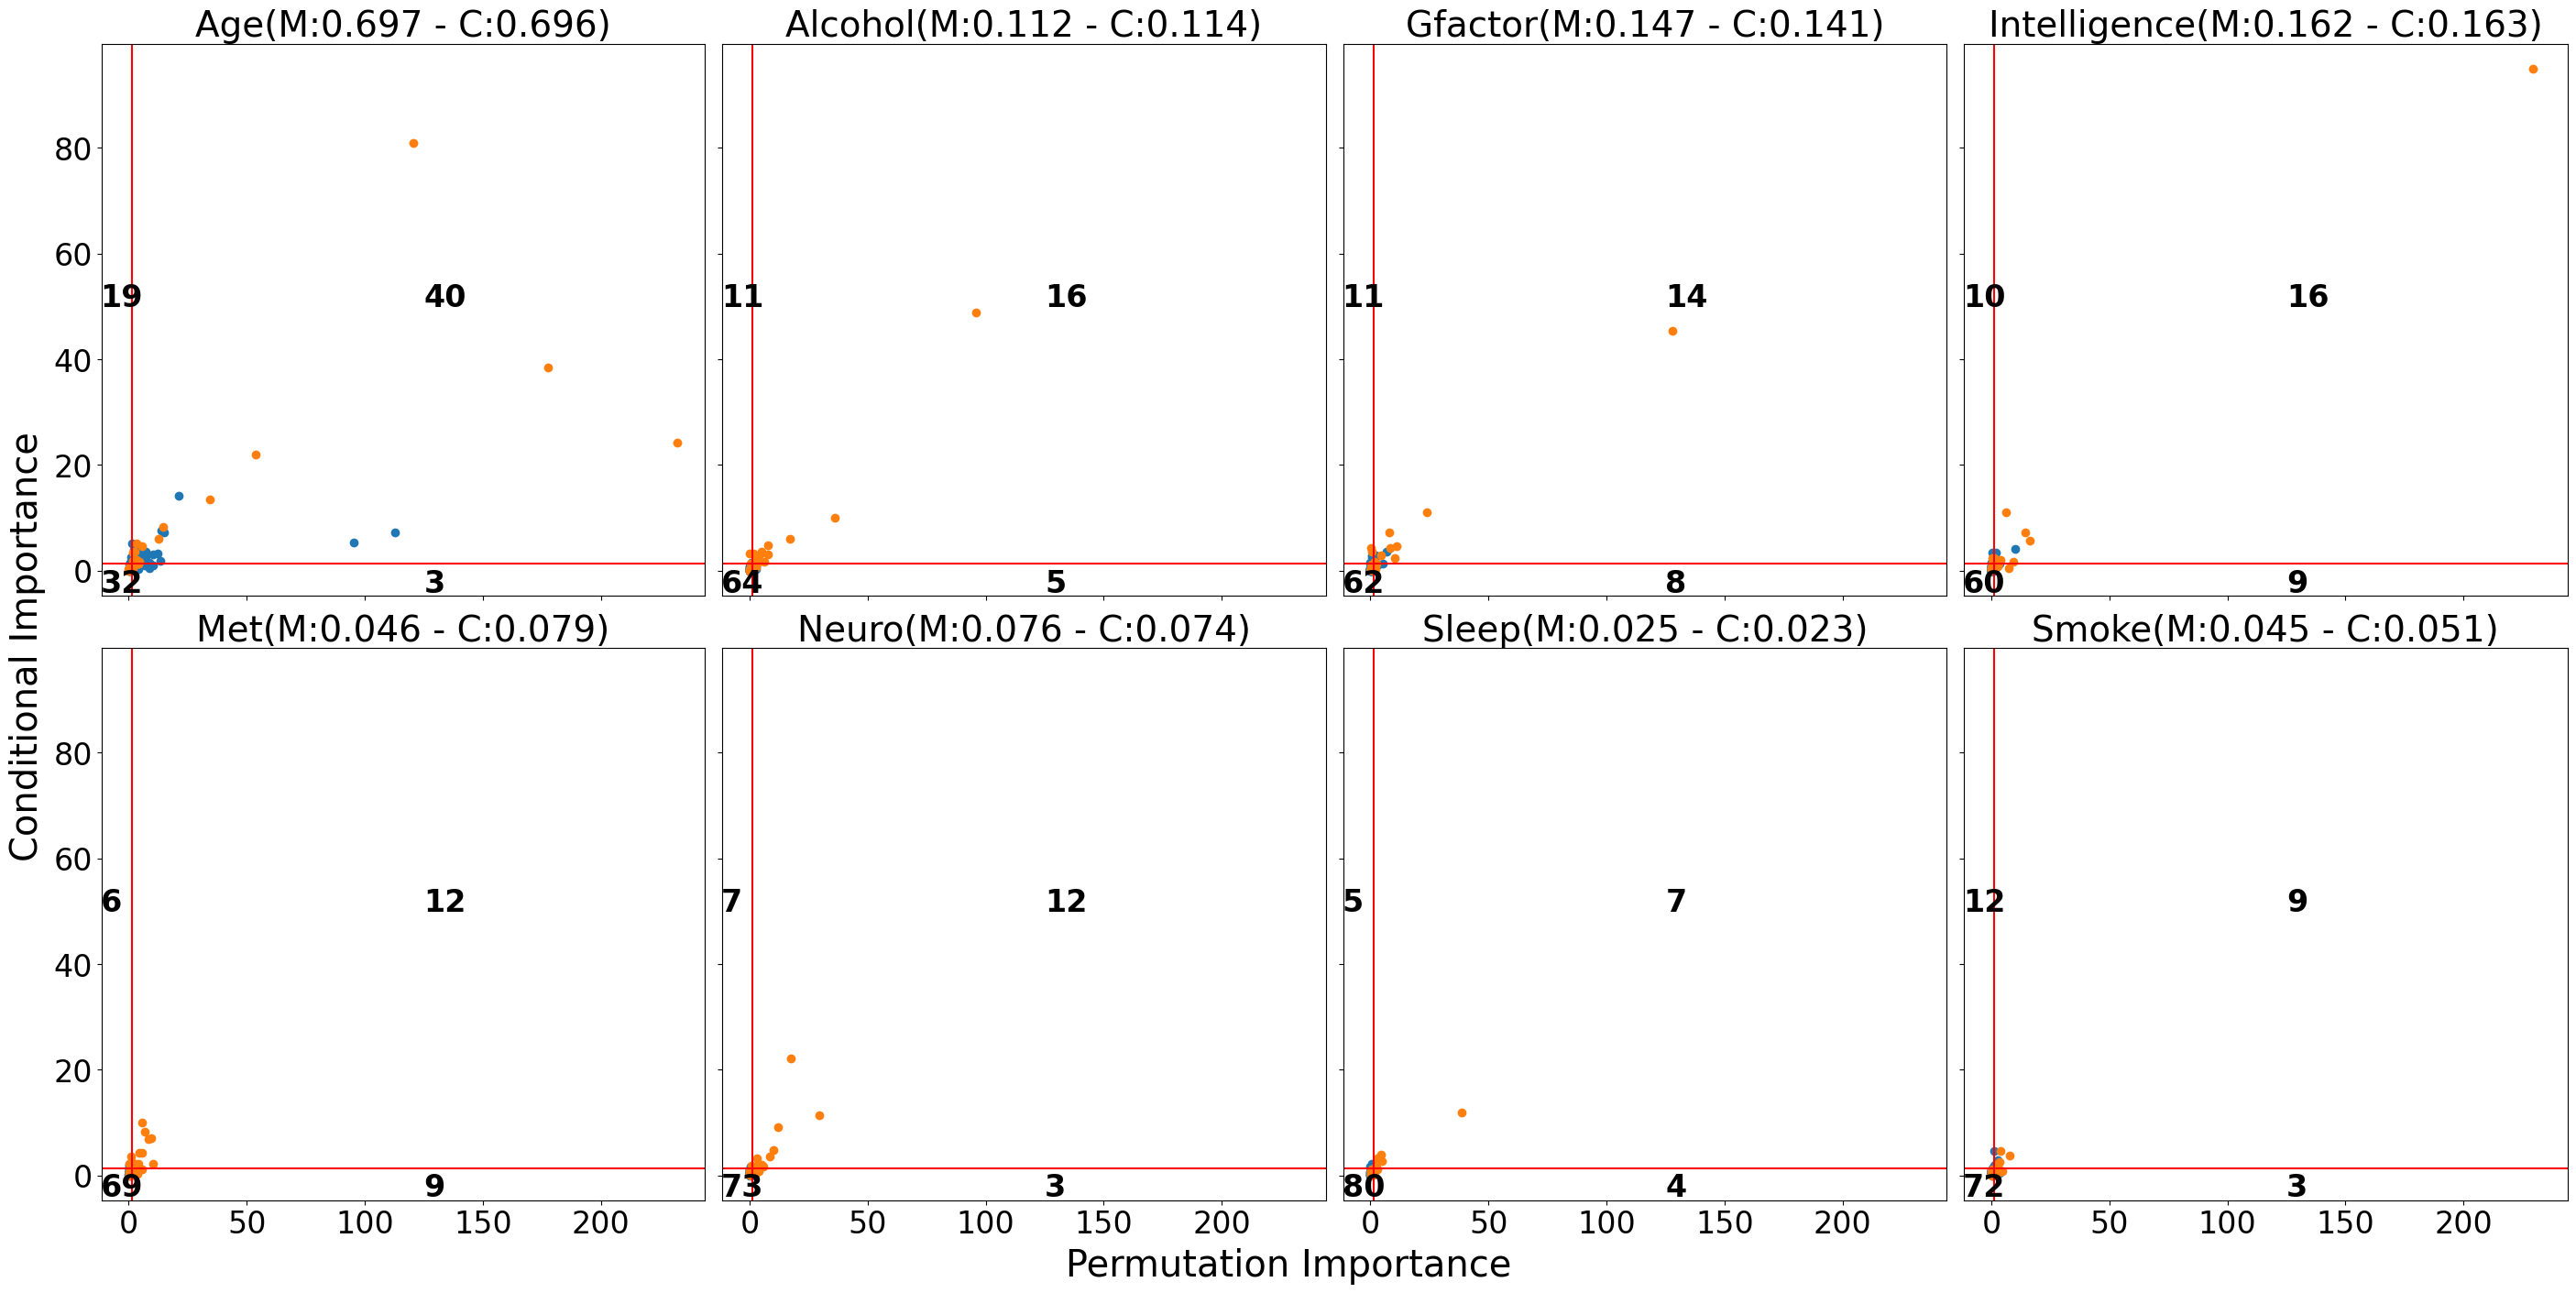

In [3]:
nrow = 2
ncol = 4

fig, axes = plt.subplots(nrow, ncol, figsize=(28, 14), constrained_layout=True,
                        sharex=True, sharey=True)

list_outcomes = ['age', 'alcohol', 'gfactor', 'intelligence', 'met', 'neuro', 'sleep', 'smoke']
# list_outcomes = ['age']
brain_variables = ['25056-2.0', '25057-2.0', '25060-2.0', '25059-2.0', '25061-2.0', '25058-2.0', '25009-2.0', '25025-2.0',
                   '25898-2.0', '25901-2.0', '25904-2.0', '25907-2.0', '25910-2.0', '25913-2.0', '25916-2.0', '25919-2.0',
                   '25396-2.0', '25393-2.0', '25392-2.0', '25394-2.0', '25397-2.0', '25395-2.0', '25156-2.0', '25153-2.0',
                   '25152-2.0', '25154-2.0', '25157-2.0', '25108-2.0', '25105-2.0', '25104-2.0', '25106-2.0', '25109-2.0',
                   '25107-2.0', '25300-2.0', '25297-2.0', '25296-2.0', '25298-2.0', '25301-2.0', '25299-2.0', '25252-2.0',
                   '25251-2.0', '25253-2.0', '25250-2.0', '25248-2.0', '25249-2.0', '25203-2.0', '25205-2.0', '25202-2.0',
                   '25200-2.0', '25201-2.0', '25204-2.0', '25443-2.0', '25445-2.0', '25442-2.0', '25440-2.0', '25441-2.0',
                   '25444-2.0', '25347-2.0', '25349-2.0', '25346-2.0', '25344-2.0', '25345-2.0', '25348-2.0', '25892-2.0',
                   '25001-2.0', '25005-2.0']

socio_variables = ['31-0.0', '21022-0.0', '20016-2.0', '20127-0.0', '1677-2.0', '1787-2.0',
                   '6138-2.0', '709-2.0', '738-2.0', '2040-2.0', '4526-2.0', '4537-2.0', '4548-2.0', '6142-2.0',
                   '4559-2.0', '4570-2.0', '4581-2.0', '670-2.0', '699-2.0', '767-2.0', '806-2.0', '816-2.0',
                   '3426-2.0', '6160-2.0', '4631-2.0', '6156-2.0', '6145-2.0', '4598-2.0', '4609-2.0', '4620-2.0']
count_output = 0
for r in range(nrow):
    for c in range(ncol):
        df_permfit = pd.read_csv(f"Result_{list_outcomes[count_output]}_permfit_single.csv")[['variable', 'p_value', 'score']]
        df_cpi = pd.read_csv(f"Result_{list_outcomes[count_output]}_cpi_single.csv")[['variable', 'p_value', 'score']]
        df = df_permfit.merge(df_cpi, on='variable', suffixes=('_permfit', '_cpi'))

        common_variables_rev = len(df[(df['p_value_permfit'] < 0.05) & (df['p_value_cpi'] < 0.05)])
        cpi_variables = len(df[(df['p_value_cpi'] < 0.05)]) - common_variables_rev
        permfit_variables = len(df[(df['p_value_permfit'] < 0.05)]) - common_variables_rev
        common_variables_norev = len(df[(df['p_value_permfit'] >= 0.05) & (df['p_value_cpi'] >= 0.05)])

        axes[r, c].scatter(-np.log10(df[df['variable'].isin(brain_variables)]['p_value_permfit']),
                           -np.log10(df[df['variable'].isin(brain_variables)]['p_value_cpi']))
        axes[r, c].scatter(-np.log10(df[df['variable'].isin(socio_variables)]['p_value_permfit']),
                           -np.log10(df[df['variable'].isin(socio_variables)]['p_value_cpi']))
        axes[r, c].text(125, 50, f"{common_variables_rev}", weight='bold')
        axes[r, c].text(125, -4, f"{cpi_variables}", weight='bold')
        axes[r, c].text(-12, 50, f"{permfit_variables}", weight='bold')
        axes[r, c].text(-12, -4, f"{common_variables_norev}", weight='bold')
        axes[r, c].axhline(y=-np.log10(0.05), color='r', linestyle='-')
        axes[r, c].axvline(x=-np.log10(0.05), color='r', linestyle='-')
        axes[r, c].set_title(f"{list_outcomes[count_output]}".title()+"(M:{:.3f} - C:{:.3f})".format(df['score_permfit'][0], df['score_cpi'][0]), fontsize = 28)
        count_output += 1
fig.supxlabel('Permutation Importance')
fig.supylabel('Conditional Importance')
plt.show()

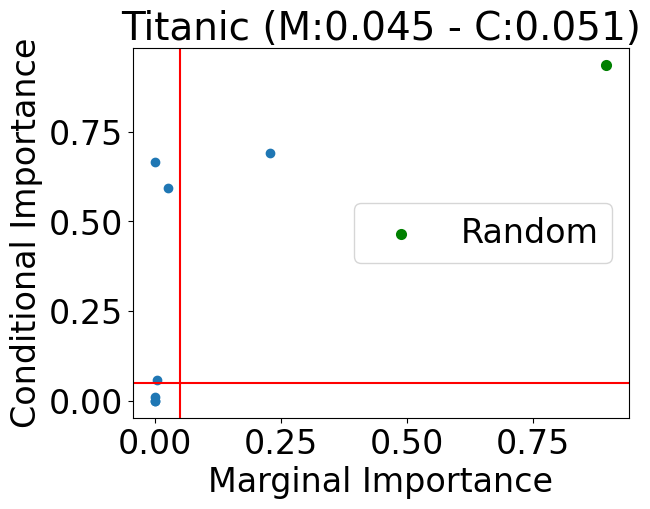

In [121]:
df_titanic = pd.read_csv("Titanic_results.csv")
df_permfit = df_titanic[df_titanic['method'] == 'Permfit']
df_permfit = df_permfit.drop(columns='method')
df_cpi = df_titanic[df_titanic['method'] == 'Cpi']
df_cpi = df_cpi.drop(columns='method')
df_titanic = df_permfit.merge(df_cpi, on='variable', suffixes=('_permfit', '_cpi'))

plt.scatter(df_titanic['p_value_permfit'], df_titanic['p_value_cpi'])
plt.scatter(df_titanic[df_titanic['variable'] == 'Random']['p_value_permfit'],
            df_titanic[df_titanic['variable'] == 'Random']['p_value_cpi'], color="green", linewidth=2, label='Random')
plt.axhline(y=0.05, color='r', linestyle='-')
plt.axvline(x=0.05, color='r', linestyle='-')
plt.title("Titanic (M:{:.3f} - C:{:.3f})".format(df['score_permfit'][0], df['score_cpi'][0]), fontsize = 28)
plt.xlabel("Marginal Importance")
plt.ylabel("Conditional Importance")
plt.legend()
plt.show()

In [44]:
import plotly.express as px
from plotly.subplots import make_subplots
# list_outcomes = ['age', 'alcohol', 'gfactor', 'intelligence', 'met', 'neuroticism', 'sleep', 'smoke']
list_outcomes = ['age']

fig = make_subplots(rows=3, cols=1)

for output_ind in range(len(list_outcomes)):
    df_permfit = pd.read_csv(f"Result_{list_outcomes[output_ind]}_permfit_single.csv")[['variable', 'p_value', 'score']]
    df_cpi = pd.read_csv(f"Result_{list_outcomes[output_ind]}_cpi_single.csv")[['variable', 'p_value', 'score']]
    df = df_permfit.merge(df_cpi, on='variable', suffixes=('_permfit', '_cpi'))


    fig_curr= px.scatter(df, x='p_value_permfit', y='p_value_cpi', hover_data=['variable'],
                    title=f"{list_outcomes[output_ind]}",
                    labels={'p_value_permfit': "Marginal importance ({:.3f})".format(df['score_permfit'][0]),
                            'p_value_cpi': "Conditional importance ({:.3f})".format(df['score_cpi'][0])})
    fig_curr.add_shape(type='line',
                    x0=0,
                    y0=0.05,
                    x1=1,
                    y1=0.05,
                    line=dict(color='Red',),
    )
    fig_curr.add_shape(type='line',
                    x0=0.05,
                    y0=0,
                    x1=0.05,
                    y1=1,
                    line=dict(color='Red',),
    )
    fig = go.Figure(data=[fig_curr])
    fig_curr.show()

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'customdata': array([['767-2.0'],
                                   ['6142-2.0'],
                                   ['699-2.0'],
                                   ['25005-2.0'],
                                   ['25001-2.0'],
                                   ['709-2.0'],
                                   ['6138-2.0'],
                                   ['25892-2.0'],
                                   ['25346-2.0'],
                                   ['6160-2.0'],
                                   ['25347-2.0'],
                                   ['25203-2.0'],
                                   ['1677-2.0'],
                                   ['25157-2.0'],
                                   ['25445-2.0'],
                                   ['25205-2.0'],
                                   ['25061-2.0'],
                                   ['25056-2.0'],
                                   ['25200-2.0'],
                                   ['25904-2.0'],
                                   ['25443-2.0'],
                                   ['25397-2.0'],
                                   ['25202-2.0'],
                                   ['20127-0.0'],
                                   ['25910-2.0'],
                                   ['25345-2.0'],
                                   ['25898-2.0'],
                                   ['4537-2.0'],
                                   ['738-2.0'],
                                   ['25059-2.0'],
                                   ['2040-2.0'],
                                   ['4631-2.0'],
                                   ['25253-2.0'],
                                   ['25301-2.0'],
                                   ['25913-2.0'],
                                   ['25109-2.0'],
                                   ['25299-2.0'],
                                   ['25251-2.0'],
                                   ['6145-2.0'],
                                   ['1787-2.0'],
                                   ['25252-2.0'],
                                   ['25296-2.0'],
                                   ['25201-2.0'],
                                   ['4620-2.0'],
                                   ['25442-2.0'],
                                   ['25919-2.0'],
                                   ['3426-2.0'],
                                   ['25154-2.0'],
                                   ['25057-2.0'],
                                   ['25108-2.0'],
                                   ['25907-2.0'],
                                   ['25105-2.0'],
                                   ['6156-2.0'],
                                   ['4581-2.0'],
                                   ['31-0.0'],
                                   ['25107-2.0'],
                                   ['25009-2.0'],
                                   ['25025-2.0'],
                                   ['4598-2.0'],
                                   ['816-2.0'],
                                   ['25344-2.0'],
                                   ['25349-2.0'],
                                   ['25348-2.0'],
                                   ['25916-2.0'],
                                   ['25250-2.0'],
                                   ['25394-2.0'],
                                   ['25297-2.0'],
                                   ['25444-2.0'],
                                   ['25058-2.0'],
                                   ['25901-2.0'],
                                   ['4548-2.0'],
                                   ['670-2.0'],
                                   ['25152-2.0'],
                                   ['25392-2.0'],
                                   ['25153-2.0'],
                                   ['25106-2.0'],
                                   ['25393-2.0'],
                                   ['25060-2.0'],
                                   ['25300-2.0'],
                                   ['25396-2.0'],
                                   ['25156-2.0'],
                                   ['4526-2.0'],
                                   ['25440-2.0'],
                                   ['25298-2.0'],
                                   ['25395-2.0'],
                                   ['25249-2.0'],
                                   ['25441-2.0'],
                                   ['4609-2.0'],
                                   ['25248-2.0'],
                                   ['4559-2.0'],
                                   ['25104-2.0'],
                                   ['25204-2.0'],
                                   ['4570-2.0'],
                                   ['806-2.0']], dtype=object),
              'hovertemplate': ('Marginal importance (0.697)=%{' ... '{customdata[0]}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([3.44171733e-233, 2.54419168e-178, 4.01511352e-121, 1.71957229e-113,
                          4.24548238e-096, 1.65601460e-054, 4.09142034e-035, 6.53622539e-022,
                          1.57220955e-015, 1.87974605e-015, 1.74544707e-014, 4.85948392e-014,
                          2.30547306e-013, 4.70975355e-013, 5.22900474e-011, 5.90676082e-011,
                          1.38171078e-009, 2.11359329e-009, 4.51272938e-008, 5.45255713e-008,
                          2.12442358e-007, 2.27235810e-007, 4.41059871e-007, 1.87916989e-006,
                          3.12355620e-006, 9.94805324e-006, 1.45588656e-005, 2.36537398e-005,
                          6.76981066e-005, 7.14151727e-005, 7.83641592e-005, 8.89539633e-005,
                          1.25741565e-004, 1.70975081e-004, 1.75198546e-004, 2.17807229e-004,
                          2.29452029e-004, 4.41913255e-004, 5.40936765e-004, 5.98339563e-004,
                          1.12522152e-003, 1.89677188e-003, 3.84511544e-003, 4.41057736e-003,
                          5.24360484e-003, 7.09497768e-003, 7.39361257e-003, 1.26779530e-002,
                          1.55127625e-002, 2.26874485e-002, 2.47178382e-002, 2.53690740e-002,
                          2.55404549e-002, 2.59601282e-002, 2.73065233e-002, 2.93168754e-002,
                          3.38852683e-002, 3.76778923e-002, 3.89306141e-002, 5.09829357e-002,
                          8.16556520e-002, 8.27322140e-002, 8.93877090e-002, 1.05132874e-001,
                          1.20864199e-001, 1.21481321e-001, 1.40349632e-001, 1.64623842e-001,
                          1.69444384e-001, 1.88837159e-001, 1.93782052e-001, 2.15715935e-001,
                          2.35249709e-001, 2.61793466e-001, 3.00582701e-001, 3.08065306e-001,
                          3.32261387e-001, 3.63637365e-001, 4.22967885e-001, 4.29756433e-001,
                          6.52259123e-001, 6.97022986e-001, 7.74943799e-001, 7.86392336e-001,
                          7.97853317e-001, 8.16568103e-001, 8.68459011e-001, 8.74870867e-001,
                          8.94876075e-001, 9.56136260e-001, 9.70560558e-001, 9.82155417e-001,
                          9.97111154e-001, 9.99979518e-001]),
              'xaxis': 'x',
              'y': array([5.34357152e-25, 3.59381282e-39, 1.10602255e-81, 6.24057505e-08,
                          5.33039576e-06, 9.09696395e-23, 2.64513565e-14, 7.74010969e-15,
                          6.39732654e-08, 4.59994775e-09, 2.73008417e-08, 1.28200106e-02,
                          1.04407612e-06, 6.58504372e-04, 1.05375765e-01, 8.21099501e-04,
                          3.66105986e-01, 3.27573361e-02, 2.03735690e-03, 2.94693517e-04,
                          1.10155522e-01, 2.30294428e-03, 3.20716870e-02, 2.21418949e-05,
                          1.13253978e-04, 5.78048401e-02, 2.43765741e-03, 2.34533894e-02,
                          5.37142688e-02, 6.70247234e-02, 3.89493839e-02, 4.48509104e-02,
                          5.33678881e-01, 1.37735054e-01, 7.67380282e-03, 2.92342593e-02,
                          1.54773601e-02, 1.83504135e-01, 7.88964032e-06, 9.04456887e-03,
                          1.25801019e-02, 7.66772577e-02, 7.20385675e-01, 2.95503904e-04,
                          1.34369556e-04, 6.91981252e-04, 3.28228854e-02, 5.63984162e-01,
                          6.90948120e-03, 1.01661369e-01, 1.91292796e-01, 2.83386502e-01,
                          3.27557544e-04, 2.82570376e-01, 1.26344932e-02, 7.48837829e-01,
                          7.07962675e-06, 7.24179028e-01, 1.59525680e-01, 4.11949758e-01,
                          1.79847112e-01, 2.75525523e-03, 1.81164862e-02, 3.12182360e-01,
                          6.26869201e-01, 5.59077873e-02, 2.46292577e-01, 1.78734537e-01,
                          9.64812965e-02, 6.04110055e-02, 3.12312408e-01, 6.97860521e-01,
                          1.84643236e-01, 9.87508640e-01, 4.56564082e-01, 7.66652956e-01,
                          7.83532929e-01, 2.79108884e-02, 6.69946833e-01, 6.36103066e-02,
                          3.00830871e-01, 8.51727137e-01, 7.30063862e-01, 9.99034457e-01,
                          9.94237624e-01, 3.30318012e-01, 2.97501930e-01, 1.96463187e-01,
                          8.44003806e-01, 8.59927851e-01, 6.01783515e-01, 3.92811259e-01,
                          9.55772480e-01, 4.30271754e-01]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'shapes': [{'line': {'color': 'Red'}, 'type': 'line', 'x0': 0, 'x1': 1, 'y0': 0.05, 'y1': 0.05},
                          {'line': {'color': 'Red'}, 'type': 'line', 'x0': 0.05, 'x1': 0.05, 'y0': 0, 'y1': 1}],
               'template': '...',
               'title': {'text': 'age'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Marginal importance (0.697)'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Conditional importance (0.696)'}}}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [45]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4"))

fig.add_trace(go.Scatter(x=df['p_value_permfit'], y=df['p_value_cpi'], hoverinfo=df['variable']),
              row=1, col=1)

fig.update_layout(height=500, width=700,
                  title_text="Multiple Subplots with Titles")

fig.show()

ValueError: 
    Invalid element(s) received for the 'hoverinfo' property of scatter
        Invalid elements include: ['767-2.0', '6142-2.0', '699-2.0', '25005-2.0', '25001-2.0', '709-2.0', '6138-2.0', '25892-2.0', '25346-2.0', '6160-2.0']

    The 'hoverinfo' property is a flaglist and may be specified
    as a string containing:
      - Any combination of ['x', 'y', 'z', 'text', 'name'] joined with '+' characters
        (e.g. 'x+y')
        OR exactly one of ['all', 'none', 'skip'] (e.g. 'skip')
      - A list or array of the above

In [ ]:
nrow = 2
ncol = 4

list_outcomes = ['age', 'alcohol', 'gfactor', 'intelligence', 'met', 'neuroticism', 'sleep', 'smoke']
fig, axes = plt.subplots(nrow, ncol, figsize=(17, 10))

count = 0
for r in range(nrow):
    for c in range(ncol):
        axes[r, c].set_title(list_outcomes[count])
        axes[r, c].plot(list(df.loc[list_outcomes[count], 'Permfit/Nb Relevant']),
                        df.loc[list_outcomes[count], 'Permfit/R2 score'], 'o-', label='Permfit')
        axes[r, c].plot(list(df.loc[list_outcomes[count], 'Cpi/Nb Relevant']),
                        df.loc[list_outcomes[count], 'Cpi/R2 score'],'o-',  label='Cpi')
        axes[r, c].invert_xaxis()
        # for k in len(df.loc[list_outcomes[count], 'Permfit/R2 score']):
        #     axes[r, c].annotate(df.loc[list_outcomes[count], 'Permfit/Nb Relevant'][k], (df.loc[list_outcomes[count], 'Permfit/R2 score'].index[k],
        #                                                                               df.loc[list_outcomes[count], 'Permfit/R2 score'][k]))
        #     axes[r, c].annotate(df.loc[list_outcomes[count], 'Cpi/Nb Relevant'][k], (df.loc[list_outcomes[count], 'Cpi/R2 score'].index[k],
        #                                                                               df.loc[list_outcomes[count], 'Cpi/R2 score'][k]))
        axes[r, c].legend()
        count += 1